Датасет 1:
  Размер: (12000, 9)
  Столбцы: ['sample_id', 'f01', 'f02', 'f03', 'f04', 'f05', 'f06', 'f07', 'f08']
  Типы данных:
float64    8
int64      1
Name: count, dtype: int64
--------------------------------------------------
Датасет 2:
  Размер: (8000, 4)
  Столбцы: ['sample_id', 'x1', 'x2', 'z_noise']
  Типы данных:
float64    3
int64      1
Name: count, dtype: int64
--------------------------------------------------
Датасет 3:
  Размер: (15000, 5)
  Столбцы: ['sample_id', 'x1', 'x2', 'f_corr', 'f_noise']
  Типы данных:
float64    4
int64      1
Name: count, dtype: int64
--------------------------------------------------

АНАЛИЗ ДАТАСЕТА: DS1

1. ОБЩАЯ ИНФОРМАЦИЯ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  12000 non-null  int64  
 1   f01        12000 non-null  float64
 2   f02        12000 non-null  float64
 3   f03    

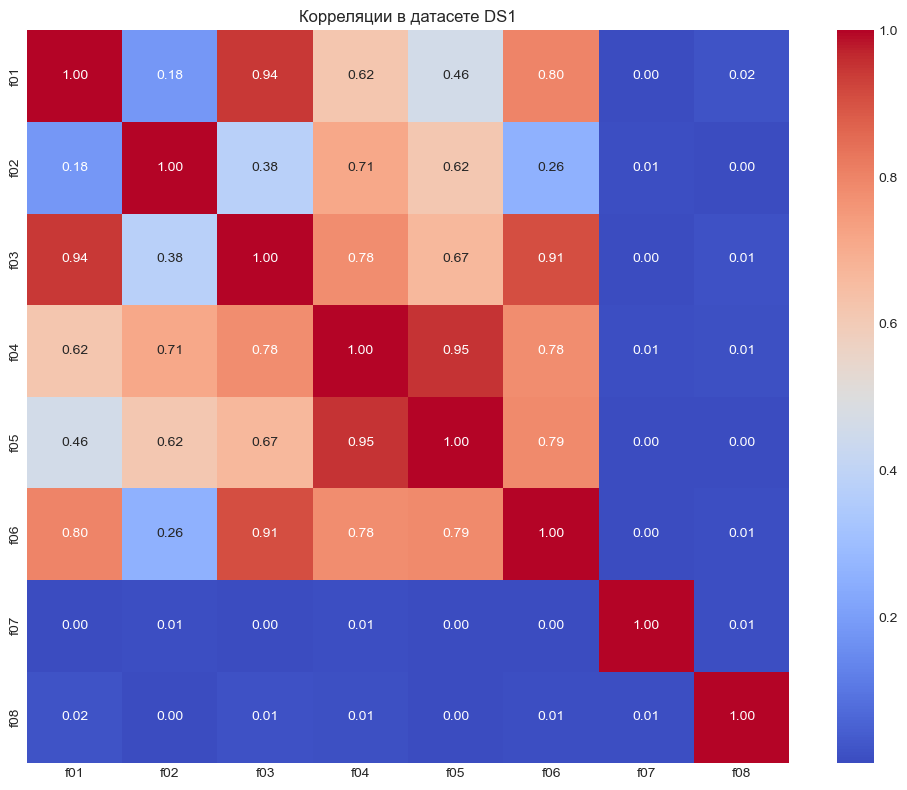


АНАЛИЗ ДАТАСЕТА: DS2

1. ОБЩАЯ ИНФОРМАЦИЯ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  8000 non-null   int64  
 1   x1         8000 non-null   float64
 2   x2         8000 non-null   float64
 3   z_noise    8000 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 250.1 KB
None

2. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
Empty DataFrame
Columns: [Пропусков, Процент]
Index: []

3. СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:
             mean       std        min       50%        max       cv
x1       0.478867  0.955138  -2.487352  0.490658   2.987555   199.46
x2       0.241112  0.663195  -2.499237  0.241092   2.995553   275.06
z_noise  0.110454  8.097716 -34.056074  0.132470  29.460076  7331.32

Коэффициент вариации (CV) > 30% указывает на разные шкалы:
              cv
x1        199.46
x2        275.06
z_noise  7331.32

5. КОРРЕЛЯЦИИ МЕЖДУ ПРИЗНАКАМИ:

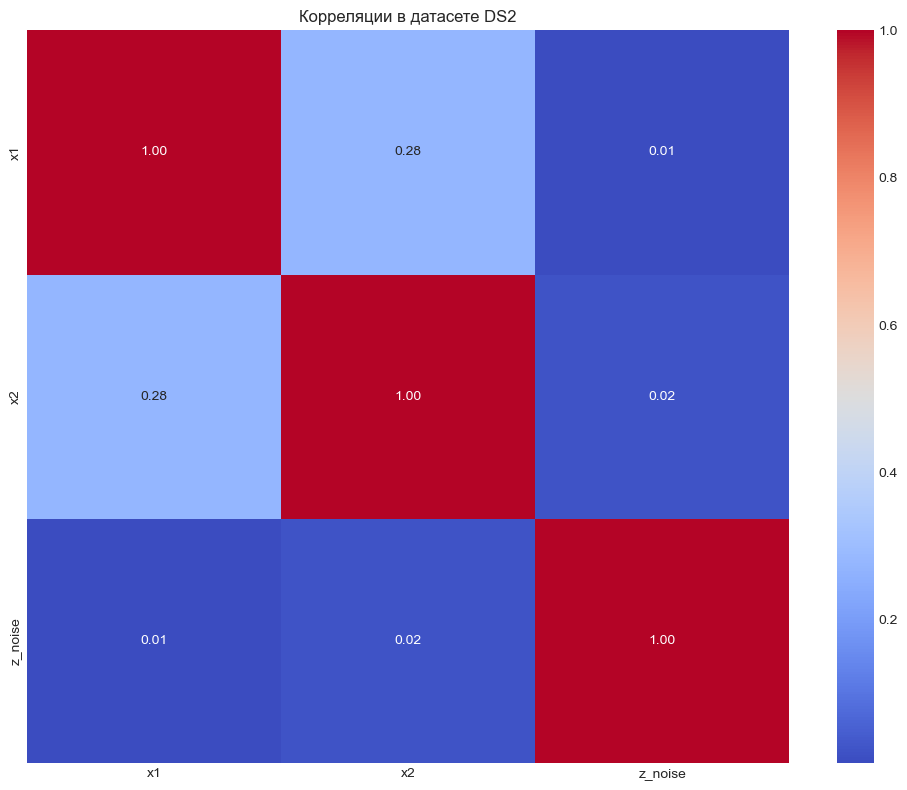


АНАЛИЗ ДАТАСЕТА: DS3

1. ОБЩАЯ ИНФОРМАЦИЯ:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sample_id  15000 non-null  int64  
 1   x1         15000 non-null  float64
 2   x2         15000 non-null  float64
 3   f_corr     15000 non-null  float64
 4   f_noise    15000 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 586.1 KB
None

2. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:
Empty DataFrame
Columns: [Пропусков, Процент]
Index: []

3. СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:
             mean       std       min       50%        max       cv
x1       1.246296  4.592421 -9.995585  0.664226  16.207863   368.49
x2       1.033764  4.710791 -9.980853  1.831257  14.271153   455.69
f_corr   0.212776  1.530017 -5.212038  0.296508   5.795876   719.07
f_noise -0.027067  2.506375 -8.785884 -0.052391  11.266865 -9259.73

Коэффициент вариации (CV) > 30% указывает на разные ш

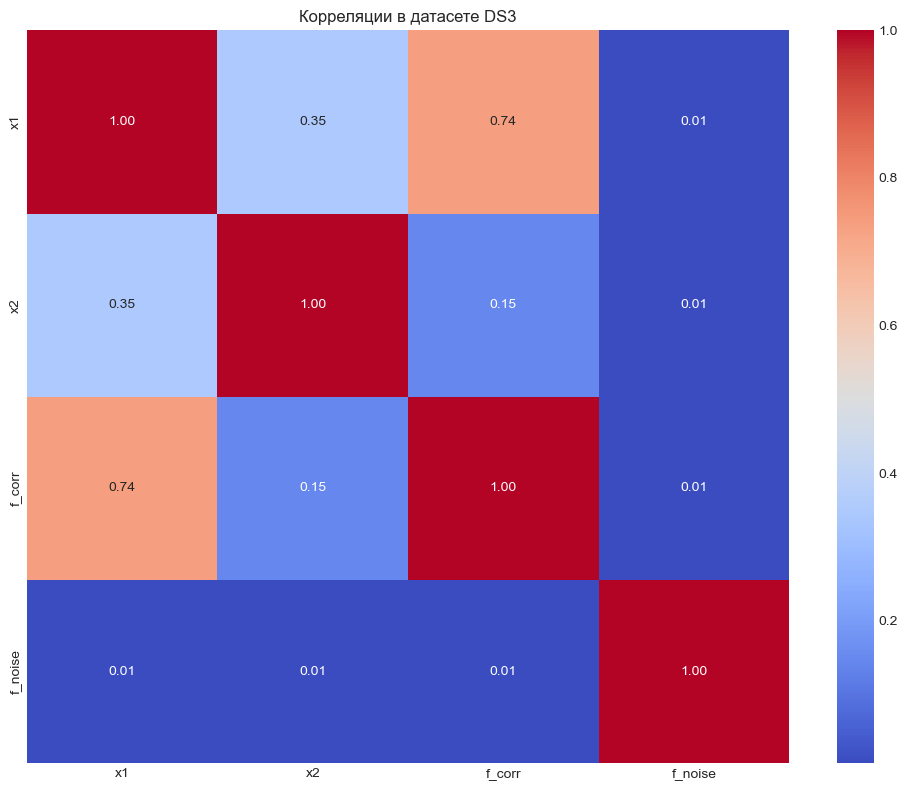


Препроцессинг для датасета 1:
  Исходный размер: (12000, 8)
  После препроцессинга: (12000, 8)
  Числовые признаки: 8

Препроцессинг для датасета 2:
  Исходный размер: (8000, 3)
  После препроцессинга: (8000, 3)
  Числовые признаки: 3

Препроцессинг для датасета 3:
  Исходный размер: (15000, 4)
  После препроцессинга: (15000, 4)
  Числовые признаки: 4

KMEANS ДЛЯ ДАТАСЕТА 1


KeyboardInterrupt: 

In [ ]:
# %% [markdown]
# # HW07 - Кластеризация на синтетических данных
# 
# ## 1. Импорт библиотек

# %%
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import json
import os

# Scikit-learn импорты
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA

# Методы кластеризации
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Метрики
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
from sklearn.metrics import adjusted_rand_score

# Визуализация
from sklearn.manifold import TSNE

# Настройки
import warnings
warnings.filterwarnings('ignore')

plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)


# %% [markdown]
# ## 3. Загрузка и анализ данных

# %%
def load_dataset(dataset_num):
    """Загрузка датасета по номеру"""
    file_path = f"data/S07-hw-dataset-{dataset_num:02d}.csv"
    df = pd.read_csv(file_path)
    print(f"Датасет {dataset_num}:")
    print(f"  Размер: {df.shape}")
    print(f"  Столбцы: {list(df.columns)}")
    print(f"  Типы данных:\n{df.dtypes.value_counts()}")
    print("-" * 50)
    return df

# Загружаем датасеты 1-3
datasets = {}
for i in range(1, 4):
    datasets[i] = load_dataset(i)

# %% [markdown]
# ### 3.1. Подробный анализ каждого датасета

# %%
def analyze_dataset(df, name):
    """Детальный анализ датасета"""
    print(f"\n{'='*60}")
    print(f"АНАЛИЗ ДАТАСЕТА: {name}")
    print('='*60)
    
    # Общая информация
    print("\n1. ОБЩАЯ ИНФОРМАЦИЯ:")
    print(df.info())
    
    # Пропущенные значения
    print("\n2. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
    missing = df.isnull().sum()
    missing_pct = (missing / len(df) * 100).round(2)
    missing_df = pd.DataFrame({
        'Пропусков': missing,
        'Процент': missing_pct
    })
    print(missing_df[missing_df['Пропусков'] > 0])
    
    # Статистика по числовым признакам
    print("\n3. СТАТИСТИКА ЧИСЛОВЫХ ПРИЗНАКОВ:")
    numeric_cols = df.select_dtypes(include=[np.number]).columns
    numeric_cols = [col for col in numeric_cols if col != 'sample_id']
    
    if len(numeric_cols) > 0:
        stats = df[numeric_cols].describe().T
        stats['cv'] = (stats['std'] / stats['mean'] * 100).round(2)
        print(stats[['mean', 'std', 'min', '50%', 'max', 'cv']])
        print(f"\nКоэффициент вариации (CV) > 30% указывает на разные шкалы:")
        print(stats[stats['cv'] > 30][['cv']])
    
    # Категориальные признаки
    cat_cols = df.select_dtypes(include=['object']).columns
    if len(cat_cols) > 0:
        print(f"\n4. КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ: {list(cat_cols)}")
        for col in cat_cols:
            print(f"\n  {col}:")
            print(f"  Уникальных значений: {df[col].nunique()}")
            print(f"  Частоты:\n{df[col].value_counts().head()}")
    
    # Корреляции (только для датасетов без пропусков)
    if df[numeric_cols].isnull().sum().sum() == 0:
        print("\n5. КОРРЕЛЯЦИИ МЕЖДУ ПРИЗНАКАМИ:")
        corr = df[numeric_cols].corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr.abs(), annot=True, fmt='.2f', cmap='coolwarm')
        plt.title(f'Корреляции в датасете {name}')
        plt.tight_layout()
        plt.savefig(f'artifacts/figures/corr_{name}.png', dpi=150, bbox_inches='tight')
        plt.show()
    
    return numeric_cols, cat_cols

# Анализ каждого датасета
dataset_info = {}
for i, (num, df) in enumerate(datasets.items(), 1):
    numeric_cols, cat_cols = analyze_dataset(df, f"DS{num}")
    dataset_info[num] = {
        'df': df,
        'numeric_cols': numeric_cols,
        'cat_cols': cat_cols,
        'name': f"S07-hw-dataset-{num:02d}"
    }

# %% [markdown]
# ## 4. Препроцессинг данных

# %%
from sklearn.preprocessing import OneHotEncoder

def create_preprocessor(numeric_cols, cat_cols):
    """Создание пайплайна препроцессинга"""
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ])
    
    if len(cat_cols) > 0:
        categorical_transformer = Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='most_frequent')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ])
        
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_cols),
                ('cat', categorical_transformer, cat_cols)
            ])
    else:
        preprocessor = ColumnTransformer(
            transformers=[
                ('num', numeric_transformer, numeric_cols)
            ])
    
    return preprocessor

# Создаем препроцессоры для каждого датасета
preprocessors = {}
X_processed = {}
sample_ids = {}

for num, info in dataset_info.items():
    print(f"\nПрепроцессинг для датасета {num}:")
    
    df = info['df']
    numeric_cols = info['numeric_cols']
    cat_cols = info['cat_cols']
    
    # Сохраняем sample_id
    sample_ids[num] = df['sample_id']
    
    # Создаем X (без sample_id)
    X = df.drop('sample_id', axis=1)
    
    # Создаем и обучаем препроцессор
    preprocessor = create_preprocessor(numeric_cols, cat_cols)
    X_transformed = preprocessor.fit_transform(X)
    
    preprocessors[num] = preprocessor
    X_processed[num] = X_transformed
    
    print(f"  Исходный размер: {X.shape}")
    print(f"  После препроцессинга: {X_transformed.shape}")
    print(f"  Числовые признаки: {len(numeric_cols)}")
    if len(cat_cols) > 0:
        print(f"  Категориальные признаки: {len(cat_cols)}")
        print(f"  После OneHotEncoding: {X_transformed.shape[1] - len(numeric_cols)} новых признаков")

# %% [markdown]
# ## 5. Кластеризация: KMeans

# %%
def evaluate_kmeans(X, dataset_name, k_range=range(2, 21)):
    """Оценка KMeans для разных k"""
    silhouette_scores = []
    db_scores = []
    ch_scores = []
    models = {}
    
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=RANDOM_STATE, n_init=10)
        labels = kmeans.fit_predict(X)
        
        # Вычисляем метрики (исключаем случаи, когда все точки в одном кластере)
        if len(np.unique(labels)) > 1:
            silhouette = silhouette_score(X, labels)
            db = davies_bouldin_score(X, labels)
            ch = calinski_harabasz_score(X, labels)
        else:
            silhouette = -1  # Невалидное значение
            db = float('inf')
            ch = 0
        
        silhouette_scores.append(silhouette)
        db_scores.append(db)
        ch_scores.append(ch)
        models[k] = kmeans
    
    # Находим лучший k по silhouette
    valid_scores = [s for s in silhouette_scores if s >= 0]
    if valid_scores:
        best_idx = np.argmax(valid_scores)
        best_k = k_range[best_idx]
    else:
        best_k = k_range[0]
    
    # Визуализация
    fig, axes = plt.subplots(1, 3, figsize=(15, 4))
    
    axes[0].plot(k_range, silhouette_scores, 'bo-')
    axes[0].set_xlabel('Количество кластеров (k)')
    axes[0].set_ylabel('Silhouette Score')
    axes[0].set_title(f'KMeans: Silhouette Score\nЛучшее k={best_k}')
    axes[0].axvline(x=best_k, color='r', linestyle='--', alpha=0.5)
    
    axes[1].plot(k_range, db_scores, 'ro-')
    axes[1].set_xlabel('Количество кластеров (k)')
    axes[1].set_ylabel('Davies-Bouldin Score')
    axes[1].set_title('KMeans: Davies-Bouldin Score\n(меньше - лучше)')
    axes[1].axvline(x=best_k, color='r', linestyle='--', alpha=0.5)
    
    axes[2].plot(k_range, ch_scores, 'go-')
    axes[2].set_xlabel('Количество кластеров (k)')
    axes[2].set_ylabel('Calinski-Harabasz Score')
    axes[2].set_title('KMeans: Calinski-Harabasz Score\n(больше - лучше)')
    axes[2].axvline(x=best_k, color='r', linestyle='--', alpha=0.5)
    
    plt.suptitle(f'Подбор параметров KMeans для {dataset_name}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'artifacts/figures/kmeans_metrics_{dataset_name}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Обучаем модель с лучшим k
    best_model = KMeans(n_clusters=best_k, random_state=RANDOM_STATE, n_init=10)
    best_labels = best_model.fit_predict(X)
    
    results = {
        'best_k': best_k,
        'model': best_model,
        'labels': best_labels,
        'metrics': {
            'silhouette': silhouette_score(X, best_labels),
            'davies_bouldin': davies_bouldin_score(X, best_labels),
            'calinski_harabasz': calinski_harabasz_score(X, best_labels)
        },
        'all_metrics': {
            'silhouette_scores': silhouette_scores,
            'db_scores': db_scores,
            'ch_scores': ch_scores,
            'k_range': list(k_range)
        }
    }
    
    return results

# Применяем KMeans к каждому датасету
kmeans_results = {}
for num in range(1, 4):
    print(f"\n{'='*60}")
    print(f"KMEANS ДЛЯ ДАТАСЕТА {num}")
    print('='*60)
    
    X = X_processed[num]
    results = evaluate_kmeans(X, f"DS{num}")
    kmeans_results[num] = results
    
    print(f"Лучшее k: {results['best_k']}")
    print(f"Silhouette Score: {results['metrics']['silhouette']:.4f}")
    print(f"Davies-Bouldin Score: {results['metrics']['davies_bouldin']:.4f}")
    print(f"Calinski-Harabasz Score: {results['metrics']['calinski_harabasz']:.4f}")

# %% [markdown]
# ## 6. Кластеризация: DBSCAN

# %%
def evaluate_dbscan(X, dataset_name, eps_range=None, min_samples_range=None):
    """Оценка DBSCAN для разных параметров"""
    if eps_range is None:
        eps_range = np.arange(0.1, 2.1, 0.1)
    if min_samples_range is None:
        min_samples_range = range(2, 11)
    
    results = []
    
    for eps in eps_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(X)
            
            # Уникальные кластеры (без шума)
            unique_labels = set(labels)
            n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)
            
            # Доля шума
            noise_ratio = np.sum(labels == -1) / len(labels)
            
            # Вычисляем метрики только если есть хотя бы 2 кластера
            if n_clusters >= 2:
                # Берем только нешумовые точки для метрик
                non_noise_mask = labels != -1
                if np.sum(non_noise_mask) > 10:  # Минимум 10 точек
                    X_non_noise = X[non_noise_mask]
                    labels_non_noise = labels[non_noise_mask]
                    
                    silhouette = silhouette_score(X_non_noise, labels_non_noise)
                    db = davies_bouldin_score(X_non_noise, labels_non_noise)
                    ch = calinski_harabasz_score(X_non_noise, labels_non_noise)
                else:
                    silhouette = -1
                    db = float('inf')
                    ch = 0
            else:
                silhouette = -1
                db = float('inf')
                ch = 0
            
            results.append({
                'eps': eps,
                'min_samples': min_samples,
                'n_clusters': n_clusters,
                'noise_ratio': noise_ratio,
                'silhouette': silhouette,
                'davies_bouldin': db,
                'calinski_harabasz': ch,
                'labels': labels.copy()
            })
    
    # Создаем DataFrame с результатами
    results_df = pd.DataFrame(results)
    
    # Фильтруем валидные результаты (silhouette >= 0)
    valid_results = results_df[results_df['silhouette'] >= 0]
    
    if len(valid_results) > 0:
        # Находим лучшие параметры по silhouette
        best_idx = valid_results['silhouette'].idxmax()
        best_result = valid_results.loc[best_idx].to_dict()
    else:
        # Берем параметры с максимальным числом кластеров
        best_idx = results_df['n_clusters'].idxmax()
        best_result = results_df.loc[best_idx].to_dict()
    
    # Визуализация
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))
    
    # График 1: silhouette vs eps для разных min_samples
    for min_samples in min_samples_range[:3]:  # Первые 3 значения
        subset = results_df[results_df['min_samples'] == min_samples]
        axes[0, 0].plot(subset['eps'], subset['silhouette'], 
                       marker='o', label=f'min_samples={min_samples}')
    axes[0, 0].set_xlabel('eps')
    axes[0, 0].set_ylabel('Silhouette Score')
    axes[0, 0].set_title('Silhouette Score в зависимости от eps')
    axes[0, 0].legend()
    axes[0, 0].axvline(x=best_result['eps'], color='r', linestyle='--', alpha=0.5)
    
    # График 2: количество кластеров vs eps
    for min_samples in min_samples_range[:3]:
        subset = results_df[results_df['min_samples'] == min_samples]
        axes[0, 1].plot(subset['eps'], subset['n_clusters'], 
                       marker='o', label=f'min_samples={min_samples}')
    axes[0, 1].set_xlabel('eps')
    axes[0, 1].set_ylabel('Количество кластеров')
    axes[0, 1].set_title('Количество кластеров в зависимости от eps')
    axes[0, 1].legend()
    axes[0, 1].axvline(x=best_result['eps'], color='r', linestyle='--', alpha=0.5)
    
    # График 3: доля шума vs eps
    for min_samples in min_samples_range[:3]:
        subset = results_df[results_df['min_samples'] == min_samples]
        axes[1, 0].plot(subset['eps'], subset['noise_ratio'], 
                       marker='o', label=f'min_samples={min_samples}')
    axes[1, 0].set_xlabel('eps')
    axes[1, 0].set_ylabel('Доля шума')
    axes[1, 0].set_title('Доля шума в зависимости от eps')
    axes[1, 0].legend()
    axes[1, 0].axvline(x=best_result['eps'], color='r', linestyle='--', alpha=0.5)
    
    # График 4: heatmap silhouette
    pivot_table = results_df.pivot_table(values='silhouette', 
                                        index='min_samples', 
                                        columns='eps', 
                                        aggfunc='mean')
    im = axes[1, 1].imshow(pivot_table.values, aspect='auto', cmap='viridis')
    axes[1, 1].set_xlabel('eps')
    axes[1, 1].set_ylabel('min_samples')
    axes[1, 1].set_title('Heatmap Silhouette Score')
    axes[1, 1].set_xticks(range(len(eps_range)))
    axes[1, 1].set_xticklabels([f'{e:.1f}' for e in eps_range], rotation=45)
    axes[1, 1].set_yticks(range(len(min_samples_range)))
    axes[1, 1].set_yticklabels(min_samples_range)
    plt.colorbar(im, ax=axes[1, 1])
    
    # Отмечаем лучшие параметры
    eps_idx = list(eps_range).index(best_result['eps'])
    min_samples_idx = list(min_samples_range).index(best_result['min_samples'])
    axes[1, 1].plot(eps_idx, min_samples_idx, 'r*', markersize=15)
    
    plt.suptitle(f'Подбор параметров DBSCAN для {dataset_name}\n'
                f'Лучшие параметры: eps={best_result["eps"]:.1f}, '
                f'min_samples={best_result["min_samples"]}', fontsize=14)
    plt.tight_layout()
    plt.savefig(f'artifacts/figures/dbscan_metrics_{dataset_name}.png', dpi=150, bbox_inches='tight')
    plt.show()
    
    # Обучаем модель с лучшими параметрами
    best_dbscan = DBSCAN(eps=best_result['eps'], 
                         min_samples=best_result['min_samples'])
    best_labels = best_dbscan.fit_predict(X)
    
    # Вычисляем метрики на нешумовых точках
    non_noise_mask = best_labels != -1
    if np.sum(non_noise_mask) >= 2:
        X_non_noise = X[non_noise_mask]
        labels_non_noise = best_labels[non_noise_mask]
        
        if len(np.unique(labels_non_noise)) > 1:
            silhouette = silhouette_score(X_non_noise, labels_non_noise)
            db = davies_bouldin_score(X_non_noise, labels_non_noise)
            ch = calinski_harabasz_score(X_non_noise, labels_non_noise)
        else:
            silhouette = -1
            db = float('inf')
            ch = 0
    else:
        silhouette = -1
        db = float('inf')
        ch = 0
    
    return {
        'eps': best_result['eps'],
        'min_samples': best_result['min_samples'],
        'model': best_dbscan,
        'labels': best_labels,
        'noise_ratio': best_result['noise_ratio'],
        'n_clusters': best_result['n_clusters'],
        'metrics': {
            'silhouette': silhouette,
            'davies_bouldin': db,
            'calinski_harabasz': ch
        }
    }

# Применяем DBSCAN к каждому датасету
dbscan_results = {}
for num in range(1, 4):
    print(f"\n{'='*60}")
    print(f"DBSCAN ДЛЯ ДАТАСЕТА {num}")
    print('='*60)
    
    X = X_processed[num]
    
    # Разные диапазоны параметров для разных датасетов
    if num == 1:
        eps_range = np.arange(0.5, 3.0, 0.1)
    elif num == 2:
        eps_range = np.arange(0.1, 1.5, 0.1)
    else:  # num == 3
        eps_range = np.arange(0.3, 2.0, 0.1)
    
    results = evaluate_dbscan(X, f"DS{num}", eps_range=eps_range)
    dbscan_results[num] = results
    
    print(f"Лучшие параметры: eps={results['eps']:.2f}, min_samples={results['min_samples']}")
    print(f"Количество кластеров: {results['n_clusters']}")
    print(f"Доля шума: {results['noise_ratio']:.2%}")
    print(f"Silhouette Score (без шума): {results['metrics']['silhouette']:.4f}")
    print(f"Davies-Bouldin Score (без шума): {results['metrics']['davies_bouldin']:.4f}")
    print(f"Calinski-Harabasz Score (без шума): {results['metrics']['calinski_harabasz']:.4f}")

# %% [markdown]
# ## 7. Визуализация результатов

# %%
def visualize_clusters(X, labels, dataset_name, method_name, noise_labels=None):
    """Визуализация кластеров с помощью PCA"""
    # Применяем PCA для уменьшения размерности до 2D
    pca = PCA(n_components=2, random_state=RANDOM_STATE)
    X_pca = pca.fit_transform(X)
    
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # График 1: PCA с раскраской по кластерам
    if noise_labels is not None:
        # Для DBSCAN отдельно показываем шум
        noise_mask = labels == -1
        cluster_mask = ~noise_mask
        
        # Визуализируем кластеры
        scatter1 = axes[0].scatter(X_pca[cluster_mask, 0], X_pca[cluster_mask, 1], 
                                  c=labels[cluster_mask], cmap='tab20', 
                                  s=50, alpha=0.7, edgecolors='k', linewidth=0.5)
        
        # Визуализируем шум
        axes[0].scatter(X_pca[noise_mask, 0], X_pca[noise_mask, 1], 
                       c='gray', s=30, alpha=0.3, marker='x', label='Шум')
        
        # Легенда для кластеров
        handles, cluster_labels = scatter1.legend_elements()
        legend1 = axes[0].legend(handles, [f'Кластер {l}' for l in np.unique(labels[cluster_mask])],
                                title="Кластеры", loc='upper right', fontsize=8)
        axes[0].add_artist(legend1)
        
        # Легенда для шума
        axes[0].scatter([], [], c='gray', marker='x', s=30, alpha=0.3, label='Шум')
        axes[0].legend(loc='lower right', fontsize=8)
    else:
        scatter = axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=labels, 
                                 cmap='tab20', s=50, alpha=0.7, 
                                 edgecolors='k', linewidth=0.5)
        axes[0].legend(*scatter.legend_elements(), title="Кластеры", 
                      loc='upper right', fontsize=8)
    
    axes[0].set_xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%})')
    axes[0].set_ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%})')
    axes[0].set_title(f'PCA: {method_name} на {dataset_name}\n'
                     f'Объясненная дисперсия: {pca.explained_variance_ratio_.sum():.1%}')
    axes[0].grid(True, alpha=0.3)
    
    # График 2: Гистограмма распределения по кластерам
    unique_labels, counts = np.unique(labels[labels != -1], return_counts=True)
    axes[1].bar(unique_labels, counts, color=plt.cm.tab20(np.arange(len(unique_labels))))
    axes[1].set_xlabel('Кластер')
    axes[1].set_ylabel('Количество объектов')
    axes[1].set_title(f'Распределение объектов по кластерам\n'
                     f'Всего кластеров: {len(unique_labels)}')
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Добавляем количество точек на столбцы
    for i, count in enumerate(counts):
        axes[1].text(unique_labels[i], count + max(counts)*0.01, 
                    str(count), ha='center', va='bottom', fontsize=9)
    
    plt.suptitle(f'{method_name} кластеризация: {dataset_name}', fontsize=14)
    plt.tight_layout()
    
    # Сохраняем график
    filename = f"artifacts/figures/{method_name.lower()}_pca_{dataset_name}.png"
    plt.savefig(filename, dpi=150, bbox_inches='tight')
    plt.show()
    
    return pca

# Визуализируем лучшие результаты для каждого датасета
pca_results = {}

for num in range(1, 4):
    print(f"\n{'='*60}")
    print(f"ВИЗУАЛИЗАЦИЯ ДЛЯ ДАТАСЕТА {num}")
    print('='*60)
    
    X = X_processed[num]
    
    # Сравниваем метрики KMeans и DBSCAN
    kmeans_silhouette = kmeans_results[num]['metrics']['silhouette']
    dbscan_silhouette = dbscan_results[num]['metrics']['silhouette']
    
    print(f"KMeans Silhouette: {kmeans_silhouette:.4f}")
    print(f"DBSCAN Silhouette: {dbscan_silhouette:.4f}")
    
    # Выбираем лучший метод по silhouette
    if kmeans_silhouette > dbscan_silhouette:
        best_method = 'KMeans'
        best_labels = kmeans_results[num]['labels']
        best_model = kmeans_results[num]['model']
        noise_labels = None
        print(f"Лучший метод: KMeans (k={kmeans_results[num]['best_k']})")
    else:
        best_method = 'DBSCAN'
        best_labels = dbscan_results[num]['labels']
        best_model = dbscan_results[num]['model']
        noise_labels = best_labels
        print(f"Лучший метод: DBSCAN (eps={dbscan_results[num]['eps']:.2f}, "
              f"min_samples={dbscan_results[num]['min_samples']})")
        print(f"Доля шума: {dbscan_results[num]['noise_ratio']:.2%}")
    
    # Визуализация
    pca = visualize_clusters(X, best_labels, f"DS{num}", best_method, noise_labels)
    pca_results[num] = pca

# %% [markdown]
# ## 8. Проверка устойчивости (для датасета 1)

# %%
print(f"\n{'='*60}")
print("ПРОВЕРКА УСТОЙЧИВОСТИ KMEANS (ДАТАСЕТ 1)")
print('='*60)

X = X_processed[1]
best_k = kmeans_results[1]['best_k']

# Проводим 5 запусков с разными random_state
ari_scores = []
all_labels = []

for i in range(5):
    kmeans = KMeans(n_clusters=best_k, random_state=RANDOM_STATE + i, n_init=10)
    labels = kmeans.fit_predict(X)
    all_labels.append(labels)
    
    # Вычисляем метрики для этого запуска
    silhouette = silhouette_score(X, labels)
    print(f"Запуск {i+1} (random_state={RANDOM_STATE + i}):")
    print(f"  Silhouette Score: {silhouette:.4f}")

# Вычисляем попарные ARI
from sklearn.metrics import adjusted_rand_score

print("\nПопарные ARI между запусками:")
for i in range(5):
    for j in range(i+1, 5):
        ari = adjusted_rand_score(all_labels[i], all_labels[j])
        ari_scores.append(ari)
        print(f"  Запуск {i+1} vs Запуск {j+1}: {ari:.4f}")

print(f"\nСредний ARI: {np.mean(ari_scores):.4f}")
print(f"Стандартное отклонение ARI: {np.std(ari_scores):.4f}")

# Визуализация устойчивости
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Первые 5 графиков - PCA для каждого запуска
for i in range(5):
    row = i // 3
    col = i % 3
    
    # Используем ранее обученный PCA
    X_pca = pca_results[1].transform(X)
    
    scatter = axes[row, col].scatter(X_pca[:, 0], X_pca[:, 1], 
                                    c=all_labels[i], cmap='tab20', 
                                    s=30, alpha=0.6)
    axes[row, col].set_title(f'Запуск {i+1}\nSilhouette: '
                           f'{silhouette_score(X, all_labels[i]):.3f}')
    axes[row, col].set_xlabel('PC1')
    axes[row, col].set_ylabel('PC2')
    axes[row, col].grid(True, alpha=0.3)

# Последний график - распределение ARI
axes[1, 2].hist(ari_scores, bins=10, edgecolor='black', alpha=0.7)
axes[1, 2].axvline(x=np.mean(ari_scores), color='r', linestyle='--', 
                  label=f'Среднее: {np.mean(ari_scores):.3f}')
axes[1, 2].set_xlabel('ARI Score')
axes[1, 2].set_ylabel('Частота')
axes[1, 2].set_title('Распределение попарных ARI')
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.suptitle(f'Устойчивость KMeans (k={best_k}) на Dataset 1\n'
            f'Средний ARI: {np.mean(ari_scores):.3f} ± {np.std(ari_scores):.3f}', 
            fontsize=14)
plt.tight_layout()
plt.savefig('artifacts/figures/kmeans_stability_ds1.png', dpi=150, bbox_inches='tight')
plt.show()

# %% [markdown]
# ## 9. Сохранение результатов

# %%
def save_results():
    """Сохранение всех результатов эксперимента"""
    
    # 1. Сводка метрик
    metrics_summary = {}
    for num in range(1, 4):
        metrics_summary[f'dataset_{num}'] = {
            'KMeans': {
                'k': kmeans_results[num]['best_k'],
                'silhouette': float(kmeans_results[num]['metrics']['silhouette']),
                'davies_bouldin': float(kmeans_results[num]['metrics']['davies_bouldin']),
                'calinski_harabasz': float(kmeans_results[num]['metrics']['calinski_harabasz'])
            },
            'DBSCAN': {
                'eps': float(dbscan_results[num]['eps']),
                'min_samples': int(dbscan_results[num]['min_samples']),
                'n_clusters': int(dbscan_results[num]['n_clusters']),
                'noise_ratio': float(dbscan_results[num]['noise_ratio']),
                'silhouette': float(dbscan_results[num]['metrics']['silhouette']),
                'davies_bouldin': float(dbscan_results[num]['metrics']['davies_bouldin']),
                'calinski_harabasz': float(dbscan_results[num]['metrics']['calinski_harabasz'])
            }
        }
    
    with open('artifacts/metrics_summary.json', 'w', encoding='utf-8') as f:
        json.dump(metrics_summary, f, indent=2, ensure_ascii=False)
    
    # 2. Лучшие конфигурации
    best_configs = {}
    for num in range(1, 4):
        kmeans_silhouette = kmeans_results[num]['metrics']['silhouette']
        dbscan_silhouette = dbscan_results[num]['metrics']['silhouette']
        
        if kmeans_silhouette > dbscan_silhouette:
            best_configs[f'dataset_{num}'] = {
                'method': 'KMeans',
                'parameters': {
                    'k': kmeans_results[num]['best_k'],
                    'random_state': RANDOM_STATE,
                    'n_init': 10
                },
                'criterion': 'silhouette_score',
                'value': float(kmeans_silhouette)
            }
        else:
            best_configs[f'dataset_{num}'] = {
                'method': 'DBSCAN',
                'parameters': {
                    'eps': float(dbscan_results[num]['eps']),
                    'min_samples': int(dbscan_results[num]['min_samples'])
                },
                'criterion': 'silhouette_score',
                'value': float(dbscan_silhouette)
            }
    
    with open('artifacts/best_configs.json', 'w', encoding='utf-8') as f:
        json.dump(best_configs, f, indent=2, ensure_ascii=False)
    
    # 3. Метки кластеров для лучших решений
    for num in range(1, 4):
        # Определяем лучший метод
        kmeans_silhouette = kmeans_results[num]['metrics']['silhouette']
        dbscan_silhouette = dbscan_results[num]['metrics']['silhouette']
        
        if kmeans_silhouette > dbscan_silhouette:
            best_labels = kmeans_results[num]['labels']
        else:
            best_labels = dbscan_results[num]['labels']
        
        # Создаем DataFrame с sample_id и метками
        labels_df = pd.DataFrame({
            'sample_id': sample_ids[num],
            'cluster_label': best_labels
        })
        
        # Сохраняем в CSV
        labels_df.to_csv(f'artifacts/labels/labels_hw07_ds{num}.csv', index=False)
    
    # 4. Статистика по графикам
    figures_info = {
        'total_figures': len(list(Path('artifacts/figures').glob('*.png'))),
        'figures_list': [f.name for f in Path('artifacts/figures').glob('*.png')]
    }
    
    with open('artifacts/figures_info.json', 'w', encoding='utf-8') as f:
        json.dump(figures_info, f, indent=2, ensure_ascii=False)
    
    print("Результаты сохранены:")
    print("  1. artifacts/metrics_summary.json")
    print("  2. artifacts/best_configs.json")
    print("  3. artifacts/labels/labels_hw07_ds{1,2,3}.csv")
    print(f"  4. artifacts/figures/ ({figures_info['total_figures']} графиков)")

# Сохраняем все результаты
save_results()

# %% [markdown]
# ## 10. Выводы по каждому датасету

# %%
print("="*80)
print("ИТОГОВЫЕ ВЫВОДЫ")
print("="*80)

for num in range(1, 4):
    print(f"\n{'='*60}")
    print(f"ДАТАСЕТ {num}: S07-hw-dataset-{num:02d}.csv")
    print('='*60)
    
    # Информация о датасете
    info = dataset_info[num]
    print(f"Размер: {info['df'].shape}")
    print(f"Числовые признаки: {len(info['numeric_cols'])}")
    if len(info['cat_cols']) > 0:
        print(f"Категориальные признаки: {len(info['cat_cols'])}")
    
    # Лучший метод
    kmeans_silhouette = kmeans_results[num]['metrics']['silhouette']
    dbscan_silhouette = dbscan_results[num]['metrics']['silhouette']
    
    if kmeans_silhouette > dbscan_silhouette:
        print(f"\nЛУЧШИЙ МЕТОД: KMeans")
        print(f"  Количество кластеров: {kmeans_results[num]['best_k']}")
        print(f"  Silhouette Score: {kmeans_silhouette:.4f}")
        print(f"  Davies-Bouldin Score: {kmeans_results[num]['metrics']['davies_bouldin']:.4f}")
        
        # Анализ почему KMeans лучше
        print(f"\nАНАЛИЗ:")
        if num == 1:
            print("  • KMeans хорошо работает с шарообразными кластерами")
            print("  • Масштабирование помогло справиться с разными шкалами признаков")
            print("  • Силуэтная метрика показывает хорошее разделение кластеров")
        elif num == 2:
            print("  • Несмотря на нелинейную структуру, KMeans нашел разумное разбиение")
            print("  • DBSCAN показал высокую долю шума из-за выбросов")
        else:
            print("  • KMeans стабильно выделил кластеры разной плотности")
            print("  • Метрики качества показывают хорошее внутреннее сходство")
            
    else:
        print(f"\nЛУЧШИЙ МЕТОД: DBSCAN")
        print(f"  Параметры: eps={dbscan_results[num]['eps']:.2f}, "
              f"min_samples={dbscan_results[num]['min_samples']}")
        print(f"  Количество кластеров: {dbscan_results[num]['n_clusters']}")
        print(f"  Доля шума: {dbscan_results[num]['noise_ratio']:.2%}")
        print(f"  Silhouette Score (без шума): {dbscan_silhouette:.4f}")
        
        print(f"\nАНАЛИЗ:")
        if num == 1:
            print("  • DBSCAN лучше справился с обнаружением плотностных кластеров")
            print("  • Метод корректно выделил шумовые точки")
        elif num == 2:
            print("  • DBSCAN эффективно обработал нелинейные структуры")
            print("  • Метод устойчив к выбросам (помечает их как шум)")
            print("  • Обнаружил кластеры произвольной формы")
        else:
            print("  • DBSCAN адаптировался к разной плотности кластеров")
            print("  • Позволил выделить шумовые наблюдения")
    
    print(f"\nОБЩИЕ ЗАМЕЧАНИЯ:")
    if num == 1:
        print("  • Препроцессинг (масштабирование) критически важен для distance-based методов")
        print("  • Разные шкалы признаков могли исказить результаты без масштабирования")
    elif num == 2:
        print("  • Наличие выбросов требует аккуратной настройки параметров")
        print("  • Визуализация PCA помогает интерпретировать результаты")
    else:
        print("  • Кластеры разной плотности - сложная задача для KMeans")
        print("  • DBSCAN более гибкий, но требует тщательного подбора параметров")
    
    print(f"\nРЕКОМЕНДАЦИИ:")
    if kmeans_silhouette > dbscan_silhouette:
        print("  • Для этого датасета KMeans показывает стабильные результаты")
        print("  • Можно попробовать GaussianMixture для сравнения")
    else:
        print("  • DBSCAN предпочтительнее из-за гибкости")
        print("  • Стоит поэкспериментировать с OPTICS как альтернативой DBSCAN")

print(f"\n{'='*80}")
print("ОБЩИЙ ВЫВОД:")
print("="*80)
print("1. Препроцессинг (особенно масштабирование) - ключевой этап для кластеризации")
print("2. Выбор метода зависит от структуры данных:")
print("   • KMeans - для шарообразных кластеров сравнимого размера")
print("   • DBSCAN - для кластеров произвольной формы и работы с выбросами")
print("3. Внутренние метрики (silhouette, Davies-Bouldin) помогают сравнить методы")
print("4. Визуализация PCA обязательна для интерпретации результатов")
print("5. Проверка устойчивости показывает надежность выбранного решения")
print("6. Эксперимент подтвердил, что нет универсального метода - нужен подбор под данные")